In [ ]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
# preprocessing
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))
train_samples = 50000
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000)

scaler = StandardScaler()
MNIST_X_train = scaler.fit_transform(X_train)
MNIST_X_test = scaler.transform(X_test)
MNIST_y_train = y_train
MNIST_y_test = y_test


Data set citation:
==============================


LEEDS BUTTERFLY DATASET (v1.0)
==============================
http://www.josiahwang.com/dataset/leedsbutterfly/

Josiah Wang, Katja Markert, and Mark Everingham

For any enquiries please contact Josiah Wang (http://www.josiahwang.com)


Version history
===============
v1.0    29/11/2010    Initial release
v1.1    23/01/2023    Updated contact


Citation
========
If you use this dataset please cite the following work:

Josiah Wang, Katja Markert, and Mark Everingham.
"Learning Models for Object Recognition from Natural Language Descriptions".
In Proceedings of the 20th British Machine Vision Conference (BMVC2009), Sept 2009

@InProceedings{Wang09,
   title = "Learning Models for Object Recognition from Natural Language Descriptions",
   author = "Josiah Wang and Katja Markert and Mark Everingham",
   booktitle = "Proceedings of the British Machine Vision Conference",
   year = "2009"
}



Information
===========
This ZIP archive contains:
1. 832 images for ten butterfly categories (55-100 images per category), collected from Google Images and manually filtered.
2. Segmentation masks for each image
3. Textual descriptions for each butterfly category, obtained from http://www.enature.com/fieldguides/.


Images
======
The 'images' folder contains a total of 832 images for ten butterfly categories, in PNG format.
Naming convention: Each image is prefixed with the category ID of the butterfly (001, 002, ..., 010) followed by the sequence number of the image within the category. Please note that the sequence numbers may not necessarily be consecutive.

The scientific (Latin) names of the butterfly categories are:
001: Danaus plexippus
002: Heliconius charitonius
003: Heliconius erato
004: Junonia coenia
005: Lycaena phlaeas
006: Nymphalis antiopa
007: Papilio cresphontes
008: Pieris rapae
009: Vanessa atalanta
010: Vanessa cardui


Segmentation masks
==================
The 'segmentations' folder contains segmentation masks of each image in PNG format. Pixels with values 1 and 3 represent foreground pixels, and others background pixels.
Please refer to our BMVC2009 paper for more details on how the segmentation masks were generated.


Textual Descriptions
====================
The 'descriptions' folder contains 10 text files, each containing the textual description for a butterfly category.
The files are named according to the category ID of the butterfly (001, 002, ... , 010) -- see the "Images" section above.

Each text file contains three lines:
Line 1: Scientific (Latin) name of the butterfly
Line 2: Common (English) name of the butterfly
Line 3: Textual description of the butterfly from eNature.com


Dataset webpage: http://www.josiahwang.com/dataset/leedsbutterfly/

In [ ]:
# Load Classnames
num_classes = 10
classes = []

# Path to the descriptions folder in Google Colab's sample_data directory
descriptions_path = '/content/sample_data/leedsbutterfly/descriptions'

for i in range(1, num_classes + 1):
    with open('{}/{}.txt'.format(descriptions_path, format(i, '03d'))) as d_file:
        # The file has 3 lines. We'll read the first line and ignore it,
        # and grab the second line, which is the common name for each class.
        d_file.readline()
        common_name = d_file.readline().strip()
        classes.append(common_name)

print(*classes, sep='\n')
butterfly_classes = classes

Monarch
Zebra Longwing
Crimson-patched Longwing
Common Buckeye
American Copper
Mourning Cloak
Giant Swallowtail
Cabbage White
Red Admiral
Painted Lady


In [ ]:
# Load Images. We'll use imageio for image loading, as well as the os package
# to traverse the directory.
import os
from imageio import imread

base_dir = '/content/sample_data/leedsbutterfly/images'

images_dict = {
    '{0:03d}'.format(i): [] for i in range(1, num_classes + 1)
}

for image_filename in sorted(os.listdir(base_dir)):
    id = image_filename.split('.')[0]
    class_id = id[:3]
    class_index = id[3:]
    images_dict[class_id].append(os.path.join(base_dir, image_filename))

dataset = {}

# split 10% for validation.
for class_id in images_dict:
    images_list = images_dict[class_id]
    train_stop = int(len(images_list) * 0.9)
    train_files = images_list[:train_stop]
    validation_files = images_list[train_stop:]
    train_images = [imread(f) for f in train_files]
    validation_images = [imread(f) for f in validation_files]
    dataset[class_id] = {
        'train': train_images,
        'val': validation_images,
        'train_f': train_files,   # keep filenames for printing purposes
        'val_f': validation_files
    }

for class_id in dataset:
    print('train {}'.format(class_id), dataset[class_id]['train_f'], sep='\n')
    print('val {}'.format(class_id), dataset[class_id]['val_f'], sep='\n')


<ipython-input-4-0e85c3c6c394>:26: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  train_images = [imread(f) for f in train_files]
<ipython-input-4-0e85c3c6c394>:27: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  validation_images = [imread(f) for f in validation_files]


train 001
['/content/sample_data/leedsbutterfly/images/0010001.png', '/content/sample_data/leedsbutterfly/images/0010002.png', '/content/sample_data/leedsbutterfly/images/0010004.png', '/content/sample_data/leedsbutterfly/images/0010005.png', '/content/sample_data/leedsbutterfly/images/0010006.png', '/content/sample_data/leedsbutterfly/images/0010007.png', '/content/sample_data/leedsbutterfly/images/0010008.png', '/content/sample_data/leedsbutterfly/images/0010009.png', '/content/sample_data/leedsbutterfly/images/0010010.png', '/content/sample_data/leedsbutterfly/images/0010011.png', '/content/sample_data/leedsbutterfly/images/0010012.png', '/content/sample_data/leedsbutterfly/images/0010013.png', '/content/sample_data/leedsbutterfly/images/0010014.png', '/content/sample_data/leedsbutterfly/images/0010015.png', '/content/sample_data/leedsbutterfly/images/0010017.png', '/content/sample_data/leedsbutterfly/images/0010018.png', '/content/sample_data/leedsbutterfly/images/0010019.png', '/c

In [ ]:
from tqdm import tqdm
import random
import skimage.transform as transforms
from sklearn.decomposition import PCA

class FeatureExtractor:
  def __init__(self, in_features=15, out_classes=10):
    self.pca = PCA(n_components = in_features)
    self.out_classes = out_classes
    self.training = True

  def extract_features(self, x):
    self.pca.fit((x[:, :, 0] + x[:,:,1] + x[:,:,2])/3)
    p = self.pca.singular_values_
    return p

class SimpleDataloader:
  def __init__(self, images_dict, shuffle=False, width=224, height=224):
    self.feature_extractor = FeatureExtractor()
    self.images_dict = images_dict
    self.mode = 'train'
    self.train_list = []
    self.val_list = []
    self.shuffle = shuffle
    self.width = width
    self.height = height
    self.train_images = []
    self.val_images = []
    self.train_features = []
    self.val_features = []
    pbar = tqdm(total=832)
    for class_id in self.images_dict:
      for i in range(len(self.images_dict[class_id]['train'])):
        self.train_list.append((class_id, i))
        image = self.transform(self.images_dict[class_id]['train'][i])
        features = self.feature_extractor.extract_features(image)
        self.train_images.append(image)
        self.train_features.append(features)
        pbar.update(1)
      for i in range(len(self.images_dict[class_id]['val'])):
        self.val_list.append((class_id, i))
        image = self.transform(self.images_dict[class_id]['val'][i])
        features = self.feature_extractor.extract_features(image)
        self.val_images.append(image)
        self.val_features.append(features)
        pbar.update(1)

    self.set_mode('train', True)

  def set_shuffle(self, shuffle):
    self.shuffle = shuffle

  def reset_shuffle(self):
    self.indexes = list(range(len(self.data_list)))
    if self.shuffle:
      random.shuffle(self.indexes)

  def set_mode(self, mode, shuffle):
    self.set_shuffle(shuffle)
    assert mode == 'train' or mode == 'val', 'only supports training and validation'
    self.mode = mode
    if mode == 'train':
      self.data_list = self.train_list
      self.data = self.train_images
      self.features = self.train_features
    else:
      self.data_list = self.val_list
      self.data = self.val_images
      self.features = self.val_features
    self.reset_shuffle()

  def transform(self, image):
    # resize and center crop
    # reshape smallest edge to match width and height
    height, width, ch = image.shape
    if width < height:
      new_width = self.width
      scale = self.width / width
      new_height = int(height * scale)
    else:
      new_height = self.height
      scale = self.height / height
      new_width = int(width * scale)
    image_tf = transforms.resize(image, (new_height, new_width))

    # center crop
    w_start = 0
    w_stop = self.width
    h_start = 0
    h_stop = self.height
    if new_width > self.width:
      start = (new_width - self.width) // 2
      w_start = start
      w_stop = start + self.width
    if new_height > self.height:
      start = (new_height - self.height) // 2
      h_start = start
      h_stop = start + self.height
    image_tf = image_tf[h_start:h_stop, w_start:w_stop, :]

    return image_tf

  def __getitem__(self, data_index):
    i = self.indexes[data_index]
    class_id, idx = self.data_list[i]
    if data_index == len(self.data_list):
      self.reset_shuffle
    return self.data[i], self.features[i], int(class_id)

  def __len__(self):
    return len(self.data_list)

# Create butterfly dataset
butterfly_dataloader = SimpleDataloader(dataset, False)

100%|██████████| 832/832 [01:39<00:00,  8.39it/s]


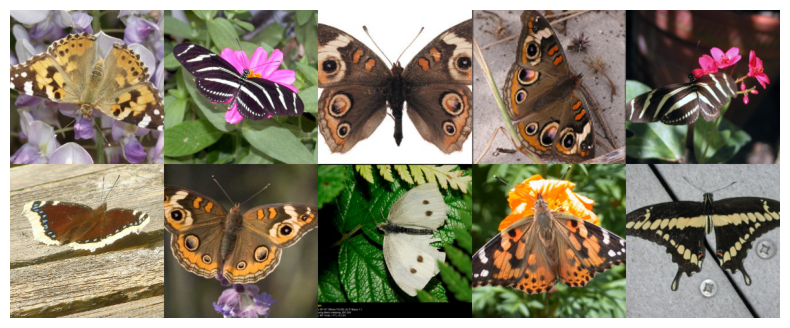

In [ ]:
# Example dataloader usage
import matplotlib.pyplot as plt

# 1. set mode and shuffle
butterfly_dataloader.set_mode('train', True)
#print(len(butterfly_dataloader)) # expect 745 train, 87 test for 832 total
imgs = []
count = 0
for i, (image, features, class_id) in enumerate((butterfly_dataloader)):
  #print(class_id) # We expect the first class id to be random when shuffle is true
                  # Here is where we would run whatever training iteration we wanted.
  imgs.append(image)
  count += 1
  if count >= 10:
    break
example_images = np.concatenate([np.concatenate(imgs[:5], axis=1), np.concatenate(imgs[5:], axis=1)], axis=0)
fig, ax = plt.subplots(figsize=(8, 4))
ax.imshow(example_images)
ax.axis('off')
plt.tight_layout()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
import numpy as np

def gather_features_leeds(all_classes, mode, shuffle):
  # Load preprocessed features from dataloader
  butterfly_dataloader.set_mode(mode, shuffle)
  image_features = []
  classes = []
  for j, (image, features, class_id) in enumerate(butterfly_dataloader):
    if class_id not in all_classes:
      continue
    classes.append(list(all_classes).index(class_id))
    image_features.append(features)
  scaler = StandardScaler()
  classes = np.array(classes)
  image_features = np.stack(image_features, axis=0)
  return image_features, classes

def gather_features_mnist(mode):
  if mode == 'train':
    return MNIST_X_train, MNIST_y_train
  else:
    return MNIST_X_test, MNIST_y_test

def train(classifier, all_classes=None, data='MNIST', quiet=False, return_lda=False):
  # load train data
  if data == 'MNIST':
    if not quiet:
      print("TRAINING MNIST")
    train_features, train_classes = gather_features_mnist('train')
  else:
    if not quiet:
      print("TRAINING LEEDS")
    train_features, train_classes = gather_features_leeds(all_classes, 'train', True)
  # train LDA and train classifier
  lda = LinearDiscriminantAnalysis(n_components=1).fit(train_features, train_classes)
  train_features = lda.transform(train_features)
  classifier.fit(train_features, train_classes)

  # score train classification
  train_acc = classifier.score(train_features, train_classes)

  # load validation data
  if data == 'MNIST':
    val_features, val_classes = gather_features_mnist('test')
  else:
    val_features, val_classes = gather_features_leeds(all_classes, 'val', False)
  # transform LDA
  val_features = lda.transform(val_features)
  # score validation classification
  val_acc = classifier.score(val_features, val_classes)

  if return_lda:
    return train_acc, val_acc, lda
  return train_acc, val_acc

In [ ]:
# select 2 random classes
all_classes = np.random.choice(range(1, 11), 2, replace=False)
features = 5
depth = 18
estimators = 15
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=depth),
    n_estimators=estimators,
    learning_rate=1.5,
    algorithm="SAMME"
)
t_acc, v_acc = train(classifier)
print("train_acc {} val acc {}, random {}".format(t_acc, v_acc, 1./10))
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=depth),
    n_estimators=estimators,
    learning_rate=1.5,
    algorithm="SAMME"
)
t_acc, v_acc = train(classifier, all_classes, 'LEEDS')
print("train_acc {} val acc {}, random {}".format(t_acc, v_acc, 1./2))


TRAINING MNIST
train_acc 0.97954 val acc 0.3151, random 0.1
TRAINING LEEDS
train_acc 0.9938650306748467 val acc 0.47368421052631576, random 0.5


In [ ]:
from sklearn.linear_model import LogisticRegression
all_classes = np.random.choice(range(1, 11), 2, replace=False)
classifier = LogisticRegression(
                C=1000. / train_samples, penalty='l2', solver='saga', tol=0.1
             )
t_acc, v_acc = train(classifier)
print("train_acc {} val acc {}, random {}".format(t_acc, v_acc, 1./10))

classifier = LogisticRegression(
                C=1000. / len(butterfly_dataloader), penalty='l2', solver='saga', tol=0.01
             )
t_acc, v_acc = train(classifier, all_classes, 'LEEDS')
print("train_acc {} val acc {}, random {}".format(t_acc, v_acc, 1./2))

TRAINING MNIST
train_acc 0.40512 val acc 0.4066, random 0.1
TRAINING LEEDS
train_acc 0.7766990291262136 val acc 0.7692307692307693, random 0.5


In [ ]:
from sklearn.neural_network import MLPClassifier
all_classes = np.random.choice(range(1, 11), 2, replace=False)
classifier = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(15, 15), random_state=1, max_iter=10000, warm_start=True)
t_acc, v_acc = train(classifier)
print("train_acc {} val acc {}, random {}".format(t_acc, v_acc, 1./10))

classifier = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(15, 15), random_state=1, max_iter=10000, warm_start=True)
t_acc, v_acc = train(classifier, all_classes, 'LEEDS')
print("train_acc {} val acc {}, random {}".format(t_acc, v_acc, 1./2))

TRAINING MNIST
train_acc 0.42852 val acc 0.4253, random 0.1
TRAINING LEEDS
train_acc 0.7756410256410257 val acc 0.5789473684210527, random 0.5


In [ ]:
ada_classifiers = []
t_accs, v_accs = [], []
random_acc = [1./N for N in range(2, 11)]
for c in range(2, 11):
  added = False
  best = ()
  best_v = 0
  for depth in range(2, 18, 2):
    for estimators in range(3, 15, 3):
      if c == 10:
        all_classes = np.array(range(1, 11))
      else:
        all_classes = np.random.choice(range(1, 11), c, replace=False)
      classifier = AdaBoostClassifier(
          DecisionTreeClassifier(max_depth=depth),
          n_estimators=estimators,
          learning_rate=1.5,
          algorithm="SAMME"
      )
      t_acc, v_acc, lda = train(classifier, all_classes, "LEEDS", True, True)
      if v_acc > best_v:
        best = (t_acc, v_acc)
        if added:
          ada_classifiers[-1] = (classifier, lda)
        else:
          ada_classifiers.append((classifier, lda))
          added = True
  t_accs.append(best[0])
  v_accs.append(best[1])
  print("{}: train acc {} val acc {} random {}".format(c, best[0], best[1], 1./c))


2: train acc 1.0 val acc 0.3888888888888889 random 0.5
3: train acc 1.0 val acc 0.5909090909090909 random 0.3333333333333333
4: train acc 1.0 val acc 0.4444444444444444 random 0.25
5: train acc 1.0 val acc 0.24390243902439024 random 0.2
6: train acc 1.0 val acc 0.14 random 0.16666666666666666
7: train acc 1.0 val acc 0.26229508196721313 random 0.14285714285714285
8: train acc 1.0 val acc 0.1323529411764706 random 0.125
9: train acc 1.0 val acc 0.14285714285714285 random 0.1111111111111111
10: train acc 1.0 val acc 0.14942528735632185 random 0.1


In [ ]:
import random
mlp_classifiers = []
t_accs_mlp, v_accs_mlp = [], []
random_acc = [1./N for N in range(2, 11)]
for c in range(2, 11):
  added = False
  for hidden in range(5, 20, 5):
    best = ()
    best_v = 0
    if c == 10:
      all_classes = np.array(range(1, 11))
    else:
      all_classes = np.random.choice(range(1, 11), c, replace=False)
    features = 5
    depth = 18
    estimators = 15
    classifier =  MLPClassifier(solver='lbfgs', alpha=1e-5,
                hidden_layer_sizes=(hidden, hidden), random_state=1,
                max_iter=10000, warm_start=True, early_stopping=True
    )
    t_acc, v_acc, lda = train(classifier, all_classes, 'LEEDS', True, True)
    if v_acc > best_v:
      best = (t_acc, v_acc)
      if added:
        mlp_classifiers[-1] = (classifier, lda)
      else:
        mlp_classifiers.append((classifier, lda))
  t_accs_mlp.append(best[0])
  v_accs_mlp.append(best[1])
  print("{}: train acc {} val acc {} random {}".format(c, best[0], best[1], 1./c))


2: train acc 0.7806451612903226 val acc 0.7777777777777778 random 0.5
3: train acc 0.6954314720812182 val acc 0.4583333333333333 random 0.3333333333333333
4: train acc 0.6059602649006622 val acc 0.6 random 0.25
5: train acc 0.44598337950138506 val acc 0.20930232558139536 random 0.2
6: train acc 0.40789473684210525 val acc 0.3018867924528302 random 0.16666666666666666
7: train acc 0.32186234817813764 val acc 0.22033898305084745 random 0.14285714285714285
8: train acc 0.2944078947368421 val acc 0.24285714285714285 random 0.125
9: train acc 0.28012048192771083 val acc 0.23076923076923078 random 0.1111111111111111
10: train acc 0.2684563758389262 val acc 0.21839080459770116 random 0.1


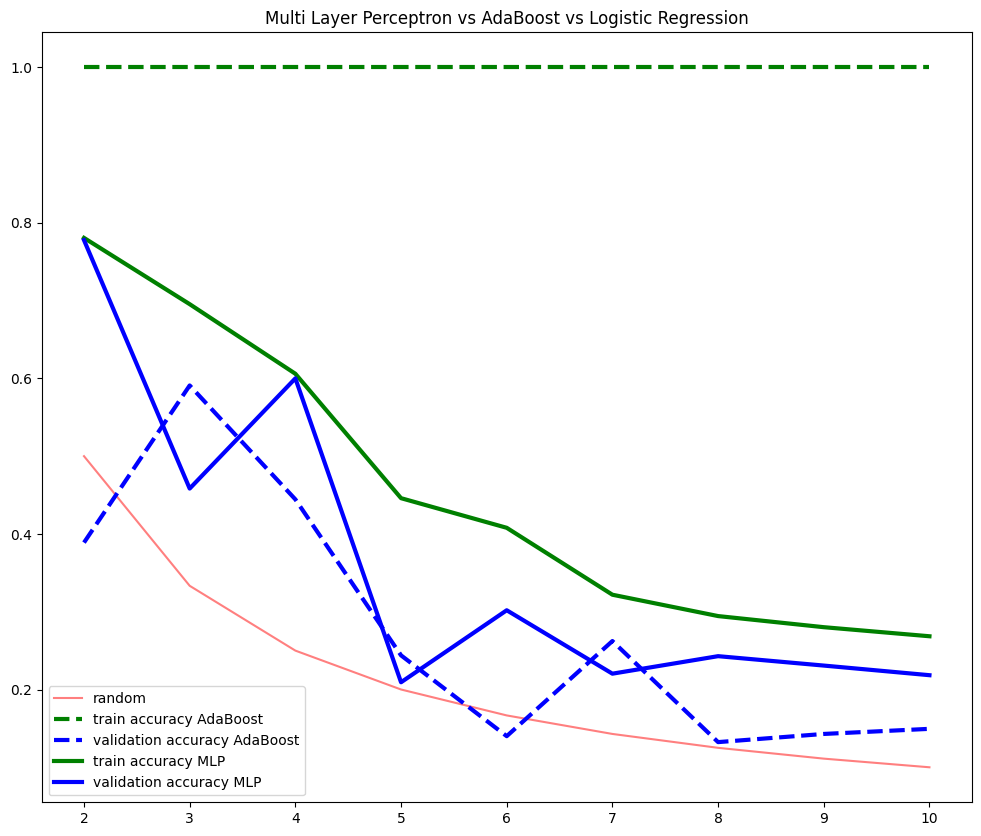

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
ax.plot(range(2, 11), random_acc, '#FF000080', label="random")
ax.plot(range(2, 11), t_accs, '#008000FF', linestyle='--', linewidth=3.0, label="train accuracy AdaBoost")
ax.plot(range(2, 11), v_accs, '#0000FFFF', linestyle='--', linewidth=3.0, label="validation accuracy AdaBoost")
ax.plot(range(2, 11), t_accs_mlp, '#008000FF', linestyle='-',linewidth=3.0, label="train accuracy MLP")
ax.plot(range(2, 11), v_accs_mlp, '#0000FFFF', linestyle='-', linewidth=3.0, label="validation accuracy MLP")
ax.set_title('Multi Layer Perceptron vs AdaBoost vs Logistic Regression')
plt.legend()
plt.show()

In [ ]:
butterfly_dataloader.set_mode('val', True)

# in hindsight, this breakdown is excessive.
examples = {
    'ada': {
        'success': {i: [] for i in range(1, 11)},
        'failure': {i: [] for i in range(1, 11)},
        'labels_success': {i: [] for i in range(1, 11)},
        'labels_failure_pred': {i: [] for i in range(1, 11)},
        'labels_failure_gt': {i: [] for i in range(1, 11)},
        'complete': {j: [False for i in range(1, 11)] for j in ['success', 'failure']},
     },
     'mlp': {
        'success': {i: [] for i in range(1, 11)},
        'failure': {i: [] for i in range(1, 11)},
        'labels_success': {i: [] for i in range(1, 11)},
        'labels_failure_pred': {i: [] for i in range(1, 11)},
        'labels_failure_gt': {i: [] for i in range(1, 11)},
        'complete': {j: [False for i in range(1, 11)] for j in ['success', 'failure']},
     }
}

for k in range(9):
  if (np.array(examples['ada']['complete']['success']).all() and
      np.array(examples['ada']['complete']['failure']).all() and
      np.array(examples['mlp']['complete']['success']).all() and
      np.array(examples['mlp']['complete']['failure']).all()):
      break
  ada_classifier, ada_lda = ada_classifiers[k]
  mlp_classifier, mlp_lda = mlp_classifiers[k]
  # plot some success and failure examples from each class
  for i, (image, features, class_id) in enumerate(butterfly_dataloader):
    features_ada = ada_lda.transform(features.reshape(1, 15))
    features_mlp = mlp_lda.transform(features.reshape(1, 15))
    pred_ada = int(ada_classifier.predict(features_ada.reshape(-1, 1)))
    pred_mlp = int(mlp_classifier.predict(features_mlp.reshape(-1, 1)))

    success_ada = pred_ada == class_id
    success_mlp = pred_mlp == class_id
    if not success_ada and not examples['ada']['complete']['failure'][class_id-1]:
        examples['ada']['failure'][class_id].append(image)
        examples['ada']['labels_failure_pred'][class_id].append(butterfly_classes[pred_mlp-1])
        examples['ada']['labels_failure_gt'][class_id].append(butterfly_classes[class_id-1])
        if len(examples['ada']['failure'][class_id]) >= 1:
          examples['ada']['complete']['failure'][class_id-1] = True
      # ada failure
    elif success_ada and not examples['ada']['complete']['success'][class_id-1]:
        examples['ada']['success'][class_id].append(image)
        examples['ada']['labels_success'][class_id].append(butterfly_classes[class_id-1])
        if len(examples['ada']['success'][class_id]) >= 1:
          examples['ada']['complete']['success'][class_id-1] = True
      # ada success
    elif not success_mlp  and not examples['mlp']['complete']['failure'][class_id-1]:
        examples['mlp']['failure'][class_id].append(image)
        examples['mlp']['labels_failure_pred'][class_id].append(butterfly_classes[pred_mlp-1])
        examples['mlp']['labels_failure_gt'][class_id].append(butterfly_classes[class_id-1])
        if len(examples['mlp']['failure'][class_id]) >= 1:
          examples['mlp']['complete']['failure'][class_id-1] = True
      # mlp failure
    elif not examples['mlp']['complete']['success'][class_id-1]:
        examples['mlp']['success'][class_id].append(image)
        examples['mlp']['labels_success'][class_id].append(butterfly_classes[class_id-1])
        if len(examples['mlp']['success'][class_id]) >= 1:
          examples['mlp']['complete']['success'][class_id-1] = True
      # mlp success

<ipython-input-14-50402304318a>:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_ada = int(ada_classifier.predict(features_ada.reshape(-1, 1)))
<ipython-input-14-50402304318a>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_mlp = int(mlp_classifier.predict(features_mlp.reshape(-1, 1)))
<ipython-input-14-50402304318a>:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_ada = int(ada_classifier.predict(features_ada.reshape(-1, 1)))
<ipython-input-14-5

In [ ]:
count_success_mlp = 0
count_failure_mlp = 0
count_success_ada = 0
count_failure_ada = 0
for c in range(10):
  try:
    image_success_mlp = examples['mlp']['success'][c][0]
    label_success_mlp = examples['mlp']['labels_success'][c][0]
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.imshow(image_success_mlp)
    ax.set_title('MLP Success:\n {}'.format(label_success_mlp))
    ax.axis('off')
    ax.titlesize = 72
    plt.tight_layout()
    plt.savefig('success_mlp_{}.png'.format(count_success_mlp))
    count_success_mlp += 1
    plt.close()
  except:
    continue
  try:
    image_success_ada = examples['ada']['success'][c][0]
    label_success_ada = examples['ada']['labels_success'][c][0]
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.imshow(image_success_ada)
    ax.set_title('AdaBoost Success:\n {}'.format(label_success_mlp))
    ax.axis('off')
    ax.titlesize = 72
    plt.tight_layout()
    plt.savefig('success_ada_{}.png'.format(count_success_ada))
    count_success_ada += 1
    plt.close()
  except:
    pass
  try:
    image_failure_mlp = examples['mlp']['failure'][c][0]
    label_failure_mlp_gt = examples['mlp']['labels_failure_gt'][c][0]
    label_failure_mlp_pred = examples['mlp']['labels_failure_pred'][c][0]
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.imshow(image_failure_mlp)
    ax.set_title('MLP Failure\nGuess: {}\nTruth: {}'.format(label_failure_mlp_pred, label_failure_mlp_gt))
    ax.titlesize = 52
    ax.axis('off')
    plt.tight_layout()
    plt.savefig('failure_mlp_{}.png'.format(count_failure_mlp))
    count_failure_mlp += 1
    plt.close()
  except:
    pass
  try:
    image_failure_ada = examples['ada']['failure'][c][0]
    label_failure_ada_gt = examples['ada']['labels_failure_gt'][c][0]
    label_failure_ada_pred = examples['ada']['labels_failure_pred'][c][0]
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.imshow(image_failure_ada)
    ax.set_title('AdaBoost Failure\nGuess: {}\nTruth: {}'.format(label_failure_ada_pred, label_failure_ada_gt))
    ax.axis('off')
    ax.titlesize = 52
    plt.tight_layout()
    plt.savefig('failure_ada_{}.png'.format(count_failure_ada))
    count_failure_ada += 1
    plt.close()
  except:
    pass

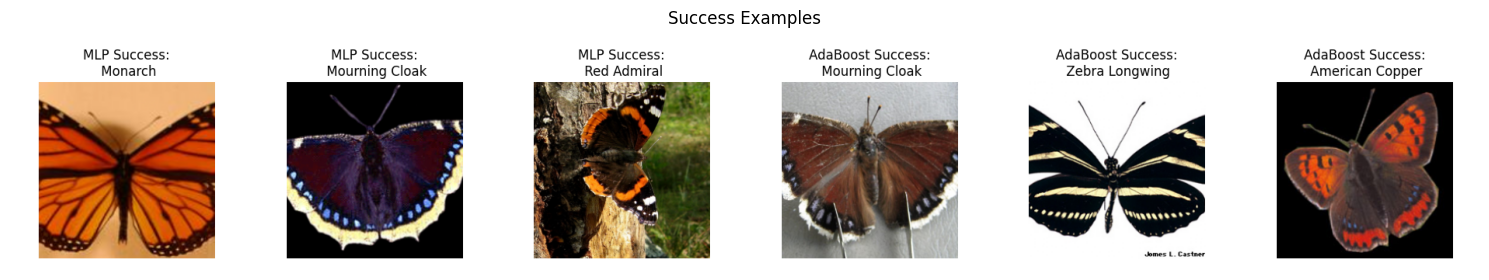

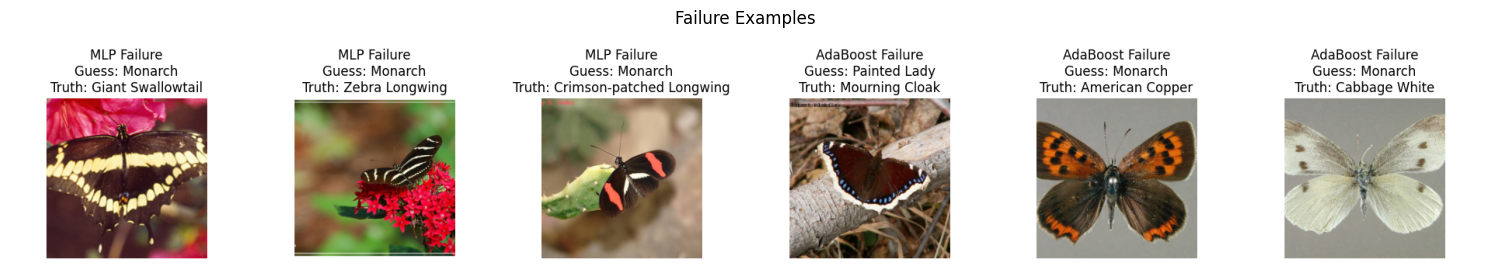

In [ ]:
# success plot
fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(15, 3))
rng = list(range(count_success_mlp))
random.shuffle(rng)
for i, idx in enumerate(rng[:3]):
  ax[i].imshow(plt.imread('success_mlp_{}.png'.format(idx)))
  ax[i].axis('off')
rng = list(range(count_success_ada))
random.shuffle(rng)
for i, idx in enumerate(rng[:3]):
  ax[i+3].imshow(plt.imread('success_ada_{}.png'.format(idx)))
  ax[i+3].axis('off')
plt.tight_layout()
plt.suptitle('Success Examples')
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(15, 3))
rng = list(range(count_failure_mlp))
random.shuffle(rng)
for i, idx in enumerate(rng[:3]):
  ax[i].imshow(plt.imread('failure_mlp_{}.png'.format(idx)))
  ax[i].axis('off')
rng = list(range(count_failure_ada))
random.shuffle(rng)
for i, idx in enumerate(rng[:3]):
  ax[i+3].imshow(plt.imread('failure_ada_{}.png'.format(idx)))
  ax[i+3].axis('off')
plt.tight_layout()
plt.suptitle('Failure Examples')
plt.show()